In [69]:
import datetime
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# konfiguracja wykresów
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 12 , 10

# w formacie .csv są opbulikowane na Kaggle
# https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses?datasetId=521&sortBy=voteCount&language=Python

In [70]:
# funkcje do zapoznania się z danymi
def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels


def category_values(dataframe, categories):
    for c in categories:
        print('\n', dataframe.groupby(by=c)[c].count().sort_values(ascending=False))
        print('Nulls: ', dataframe[c].isnull().sum())

In [71]:
df = pd.read_csv('input/AviationData.csv', sep=',', header=0, encoding = 'iso-8859-1')
df.sample(10)

C:\Users\micha\AppData\Local\Temp\ipykernel_26328\3687638303.py:1: DtypeWarning:

Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.



,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
36212,20001206X02507,Accident,NYC95LA006,1994-10-11,"FARMINGTON, ME",United States,NaN,NaN,NONE,YOUNG'S AIRSTRIP,...,Personal,NaN,0.0,0.0,1.0,0.0,VMC,Takeoff,Probable Cause,05-04-1995
32110,20001211X11747,Accident,NYC93LA055,1993-01-23,"TETERBORO, NJ",United States,NaN,NaN,TEB,TETERBORO,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,13-10-1993
24223,20001213X29553,Accident,CHI90FA003,1989-10-07,"ANN ARBOR, MI",United States,NaN,NaN,ARB,ANN ARBOR,...,Personal,NaN,3.0,0.0,0.0,0.0,VMC,Approach,Probable Cause,10-06-1991
49631,20001212X22153,Accident,FTW01FA017,2000-10-28,"E. Cameron 200, GM",United States,28.738055,-92.63,V200,Vermilion 200,...,Positioning,NaN,1.0,0.0,0.0,0.0,VMC,Cruise,Probable Cause,15-07-2002
75736,20140908X04504,Accident,ERA14WA429,2014-09-06,"Araracuara, Colombia",Colombia,000354N,0721911W,SKAC,Araracuara Airport,...,NaN,Latinoamericana De Sevicios Aereos - Laser S.A.S,10.0,0.0,0.0,0.0,VMC,NaN,NaN,25-09-2020
80522,20170828X12800,Accident,WPR17LA191,2017-08-27,"Fortuna, CA",United States,403331N,0124856W,FOT,ROHNERVILLE,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,A total loss of engine power for reasons that ...,25-09-2020
56253,20080421X00521,Accident,DCA04WA051,2004-02-20,"CANNES, FRANCE",France,NaN,NaN,NaN,NaN,...,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Foreign,NaN
15154,20001213X33788,Accident,BFO86FID09,1986-06-30,"MONTPELIER STA., VA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Cruise,Probable Cause,NaN
82170,20180821X62945,Accident,WPR18FA232,2018-08-21,"Granger, TX",United States,304124N,0097242W,GTU,Georgetown Muni,...,Instructional,Brunner Aerospace,2.0,0.0,0.0,0.0,VMC,NaN,The failure of both pilots to see and avoid a ...,25-09-2020
13435,20001214X38303,Accident,NYC86FNE01,1985-11-10,"WESTFIELD, MA",United States,NaN,NaN,BAF,WESTFIELD MUNICIPAL,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Takeoff,Probable Cause,NaN


In [72]:
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [73]:
df.shape

(88889, 31)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [75]:
df.describe(include='all')

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50132,52704,...,82697,16648,77488.000000,76379.000000,76956.000000,82977.000000,84397,61724,82505,75118
unique,87951,2,88863,14782,27758,219,25592,27156,10374,24870,...,26,13590,NaN,NaN,NaN,NaN,4,12,17074,2924
top,20001212X19172,Accident,CEN22LA149,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,NaN,NaN,NaN,NaN,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,49448,258,NaN,NaN,NaN,NaN,77303,15428,61754,17019
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.647855,0.279881,0.357061,5.325440,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.485960,1.544084,2.235625,27.913634,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN


In [76]:
describe_more(df)

,Variable,Levels,Datatype
1,Investigation.Type,2,object
16,Amateur.Built,2,object
20,Schedule,3,object
27,Weather.Condition,4,object
11,Aircraft.damage,4,object
17,Number.of.Engines,7,float64
28,Broad.phase.of.flight,12,object
18,Engine.Type,12,object
12,Aircraft.Category,15,object
21,Purpose.of.flight,26,object


In [77]:
# dekodowanie czasu i dodanie kolumn z podziałem na rok, miesiąc i dzień
df['Year'] = df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").year)
df['Month'] = df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").month)
df['Day'] = df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").day)

df = df[df['Year'] >= 1982]
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [78]:
# zapoznanie z danymi kategorycznymi
categories = ['Investigation.Type',
             'Aircraft.damage',
             'Aircraft.Category',
             'Amateur.Built',
             'Number.of.Engines',
             'Engine.Type',
             'FAR.Description',
             'Schedule',
             'Purpose.of.flight',
             'Weather.Condition',
             'Broad.phase.of.flight',
             'Report.Status',
             'Air.carrier']

for c in categories:
    print(c , df[c].unique())

Investigation.Type ['Accident' 'Incident']
Aircraft.damage ['Substantial' 'Destroyed' 'Minor' nan 'Unknown']
Aircraft.Category ['Airplane' nan 'Helicopter' 'Glider' 'Balloon' 'Gyrocraft' 'Ultralight'
 'Unknown' 'Blimp' 'Powered-Lift' 'Weight-Shift' 'Powered Parachute'
 'Rocket' 'WSFT' 'UNK' 'ULTR']
Amateur.Built ['No' 'Yes' nan]
Number.of.Engines [ 1.  2.  0.  3.  4. nan  8.  6.]
Engine.Type ['Reciprocating' 'Turbo Shaft' 'Unknown' 'Turbo Fan' 'Turbo Prop'
 'Turbo Jet' nan 'Electric' 'Hybrid Rocket' 'Geared Turbofan' 'LR' 'NONE'
 'UNK']
FAR.Description ['Part 91: General Aviation' nan 'Part 135: Air Taxi & Commuter'
 'Part 125: 20+ Pax,6000+ lbs' 'Part 121: Air Carrier' 'Part 129: Foreign'
 'Part 137: Agricultural' 'Part 133: Rotorcraft Ext. Load' 'Unknown'
 'Part 91F: Special Flt Ops.' 'Non-U.S., Non-Commercial' 'Public Aircraft'
 'Non-U.S., Commercial' 'Public Use' 'Armed Forces'
 'Part 91 Subpart K: Fractional' '091' 'NUSC' '135' 'NUSN' '121' '137'
 '129' '133' '091K' 'UNK' 'PUBU' '

In [79]:
category_values(df, categories)


 Investigation.Type
Accident    85008
Incident     3874
Name: Investigation.Type, dtype: int64
Nulls:  0

 Aircraft.damage
Substantial    64147
Destroyed      18617
Minor           2805
Unknown          119
Name: Aircraft.damage, dtype: int64
Nulls:  3194

 Aircraft.Category
Airplane             27616
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64
Nulls:  56596

 Amateur.Built
No     80305
Yes     8475
Name: Amateur.Built, dtype: int64
Nulls:  102

 Number.of.Engines
1.0    69577
2.0    11078
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64
Nulls:  6083

 Engine.Type
Re

In [80]:
# zamienianie NaN na wartości nieznane zdefniowane w bazie NTSB w zależności od kategorii
df['Broad.phase.of.flight'].fillna('UNKNOWN', inplace=True)
df['Weather.Condition'].fillna('UNK', inplace=True)
df['Aircraft.Category'].fillna('Unknown', inplace=True)
df['Purpose.of.flight'].fillna('Unknown', inplace=True)
df['Schedule'].fillna('UNK', inplace=True)
df['FAR.Description'].fillna('Unknown', inplace=True)
df['Aircraft.damage'].fillna('Unknown', inplace=True)
df['Air.carrier'].fillna('Unknown', inplace=True)
df['Make'].fillna('UNKNOWN', inplace=True)
df['Model'].fillna('Unknown', inplace=True)
df['Airport.Name'].fillna('Unknown', inplace=True)
df['Airport.Code'].fillna('Unknown', inplace=True)
df['Location'].fillna('Unknown', inplace=True)
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [81]:
# dalsze czysczenie danych
producers = [x for x in df['Make'][df['Amateur.Built']== 'No'].unique() ]
amateurs  = [x for x in df['Make'][df['Amateur.Built']== 'Yes'].unique() ]


def fix_amateur_built(ab, m):
    if type(ab) == str:
        return ab
    else:
        if m in producers:
            return 'No'
        else:
            return 'Yes'
# Fix for Amateur.Built field
am_built = df.apply(lambda x: fix_amateur_built(x['Amateur.Built'], x['Make']), axis=1)
df = df.assign(AmateurBuilt = am_built, index=df.index)

In [82]:
df['Number.of.Engines'].isna().sum()

6083

In [83]:
def fix_number_of_engines(noe, m):
    if noe >= 0:
        return noe
    else:
        # Setting number of engines at the mean number of engines for the producer
        r = np.round(df['Number.of.Engines'][df['Make']==m].mean())
        return r

# balony mają 0 silników
condition = df['Number.of.Engines'].isnull() & (df['Make'].str.contains('balloon', case=False))
df.loc[condition, 'Number.of.Engines'] = 0.0
# Correcting number of engines
num_engines = df.apply(lambda x: fix_number_of_engines(x['Number.of.Engines'], x['Make']), axis=1)
df = df.assign(NumberofEngines = num_engines, index=df.index)
df['NumberofEngines']

7        1.0
8        2.0
9        1.0
10       1.0
11       1.0
        ... 
88884    1.0
88885    1.0
88886    1.0
88887    1.0
88888    1.0
Name: NumberofEngines, Length: 88882, dtype: float64

In [84]:
df['Number.of.Engines'].describe()

count    82934.000000
mean         1.144717
std          0.448540
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: Number.of.Engines, dtype: float64

In [85]:
df['Number.of.Engines'].isna().sum()

5948

In [86]:
df['Number.of.Engines'].shape

(88882,)

In [87]:
# dalej są NaNy
df['NumberofEngines'].fillna(1, inplace=True)

In [88]:
# engine type fix
def fix_engine_type(et, model):
    if type(et) == str:
        return et
    else:
        # przypisanie mediany
        e = (df['Engine.Type'][df['Model']==model].mode())
        return  e[0] if e.count() > 0 else 'Unknown'
en_type = df.apply(lambda x: fix_engine_type(x['Engine.Type'], x['Model']), axis=1)
df = df.assign(EngineType = en_type, index=df.index)

In [89]:
# aircraft category fix
def fix_aircraft_category(cat, model):
    if type(cat) == str:
        return cat
    else:
        # przypisanie mediany
        e = (df['Aircraft.Category'][df['Model']==model].mode())
        return  e[0] if e.count() > 0 else 'Unknown'
aircraft_cat = df.apply(lambda x: fix_aircraft_category(x['Aircraft.Category'], x['Model']), axis=1)
df = df.assign(AircraftCategory = aircraft_cat, index=df.index)

In [90]:
# dane są z NTSB (USA), jeśli country jest nieznane można przypisać wartość Foreign
df['Country'].fillna('Foreign', inplace=True)

In [91]:
df['Injuries'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries']
print(df['Injuries'])

7        0.0
8        0.0
9        3.0
10       0.0
11       0.0
        ... 
88884    1.0
88885    0.0
88886    0.0
88887    0.0
88888    1.0
Name: Injuries, Length: 88882, dtype: float64


In [92]:
#df.groupby(by=['Location']).count()
df.isnull().sum()
df.to_csv("processed_AviationData.csv")

In [93]:
print(df['Country'].value_counts())

Country
United States                       82241
Brazil                                374
Canada                                359
Mexico                                358
United Kingdom                        344
                                    ...  
Seychelles                              1
Palau                                   1
Libya                                   1
Saint Vincent and the Grenadines        1
Turks and Caicos Islands                1
Name: count, Length: 220, dtype: int64


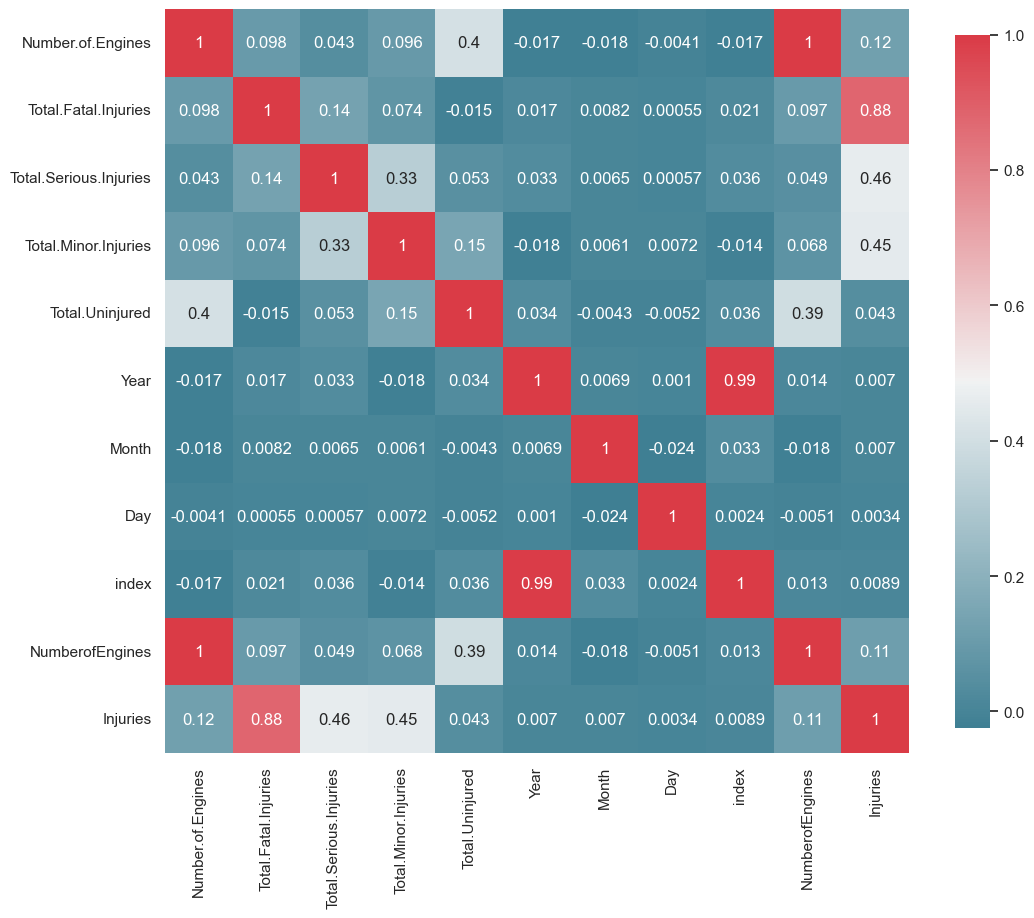

In [94]:
corr = df.corr(numeric_only=True)
_ , ax = plt.subplots( figsize =( 12 , 10 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
_ = sns.heatmap(
    corr,
    cmap = cmap,
    square=True,
    cbar_kws={ 'shrink' : .9 },
    ax=ax,
    annot = True,
    annot_kws = { 'fontsize' : 12 }
)


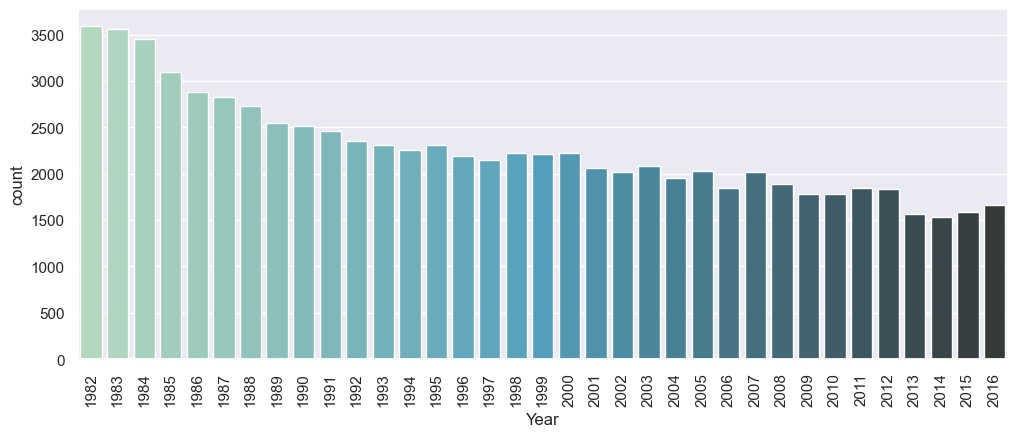

In [95]:
# wykres liczby wypadków na przestrzeni lat
df = df.sort_values(by=['Year', 'Month', 'Day'], ascending=True)

years = np.arange(1982, 2017)

sns.set(style="darkgrid")

plt.subplot(211)

g = sns.countplot(x="Year", data=df, palette="GnBu_d", order=years)
g.set_xticklabels(labels=years)
a = plt.setp(g.get_xticklabels(), rotation=90)

Score for degree 0: 0.857 
Score for degree 1: 0.939 
Score for degree 2: 0.966 


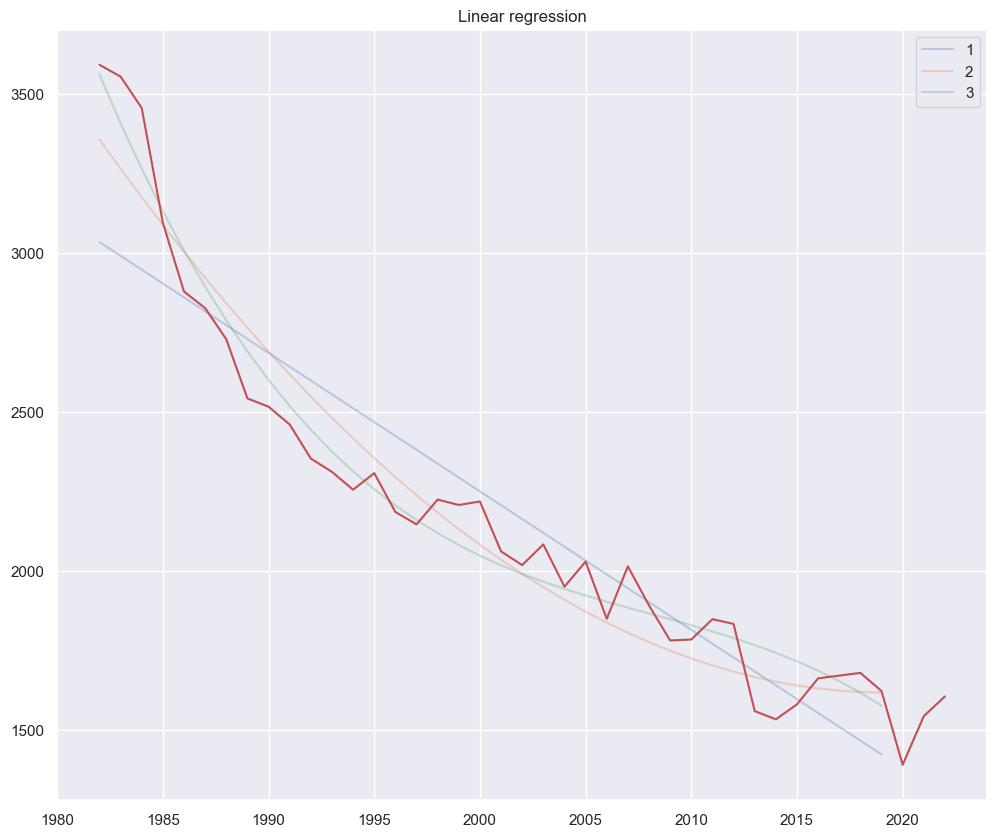

In [96]:
# próby stworzenia modelu regresji celem predykcji powyższej relacji na wykresie
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


events_per_year = df.groupby(by='Year').count()['Event.Id']
events_per_year.drop(2017, axis=0, inplace=True)

X = [ [y] for y in events_per_year.index.values]
y = [ [e] for e in events_per_year]


degrees = [1,2,3]
lr_pred_X = [[y] for y in range(1982, 2020)]
for i in range(len(degrees)):
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X, y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X, y,
                             scoring="neg_mean_squared_error", cv=10)
    lr_pred=pipeline.predict(lr_pred_X)
    plt.plot(lr_pred_X, lr_pred, alpha=.3)

    print("Score for degree %d: %.3f " % (i, pipeline.score(X, y)))

plt.plot(X, y)
plt.title("Linear regression")
plt.legend(labels=degrees)

plt.show()

In [97]:
# kopiowanie danych pod wykres mapy
df_map = df
df_map['Latitude'] = pd.to_numeric(df_map['Latitude'], errors='coerce')
df_map['Longitude'] = pd.to_numeric(df_map['Longitude'], errors='coerce')
df_map.dropna(subset=['Latitude', 'Longitude'], inplace=True)

In [98]:
# mapa zdarzeń lotniczych
import plotly.graph_objects as go

trace = go.Scattergeo(
    lat=df_map['Latitude'],
    lon=df_map['Longitude'],
    mode='markers',
    marker=dict(
        size=5,
        color='red',
        opacity=0.7,
        symbol='circle'
    )
)


layout = go.Layout(
    title='Aviation Accidents Map',
    geo=dict(
        resolution=50,
        showland=True,
        showlakes=True,
        landcolor='rgb(204, 204, 204)',
        countrycolor='rgb(204, 204, 204)',
        lakecolor='rgb(255, 255, 255)',
        projection=dict(
            type='natural earth'
        ),
        coastlinewidth=0.5,
        lataxis=dict(
            range=[-90, 90],
            showgrid=True,
            dtick=10
        ),
        lonaxis=dict(
            range=[-180, 180],
            showgrid=True,
            dtick=20
        )
    )
)

fig = go.Figure(data=[trace], layout=layout)

fig.show()
